In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from functools import reduce
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.io import imread_collection
from ast import Yield
import matplotlib.pyplot as plt
from keras.models import save_model
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from keras.optimizers import Adam
import csv

c:\ProgramData\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
height= 160
width=400

Cargamos los datos de tal manera que cada imagen la dividimos en 6 partes iguales para obtener al final imágenes que contengan un solo dígito en vez del captcha entero. También dividimos las etiquetas de cada captcha para obtener las etiquetas de las nuevas imágenes que contienen solo un dígito cada una.

In [11]:
train_path = 'data/train/*.png'
val_path = 'data/validation/*.png'
y_path = 'data/train.csv'
y_val_path ='data/validation.csv'
Y_train = pd.read_csv(y_path, dtype=str)
Y_val = pd.read_csv(y_val_path, dtype=str)
train = imread_collection(train_path)
val = imread_collection(val_path)
Y_train_digits= []
Y_val_digits = []
Y_train['Label'] = Y_train['Label'].astype(str)
Y_val['Label'] = Y_val['Label'].astype(str)
list_id = Y_val['Id'].tolist()


c =0
window = 70
X_train=[]
X_val=[]
X_val_digits=[]
for image in train:

    for x in range (1,7):
        roi = image[0:height, window*(x-1):window*x]
        grayscale_image = color.rgb2gray(roi)
        flattened_image = grayscale_image.ravel()
        normalized_image = (flattened_image - flattened_image.min()) / (flattened_image.max() - flattened_image.min())
        Y_train_digits.append(Y_train['Label'].iloc[c][x-1])
        X_train.append(normalized_image)
        
    c+=1
c =0

for image in val:
    X_val.append(image)
    
    for x in range (1,7):
        roi = image[0:height, window*(x-1):window*x]
        grayscale_image = color.rgb2gray(roi)
        flattened_image = grayscale_image.ravel()
        normalized_image = (flattened_image - flattened_image.min()) / (flattened_image.max() - flattened_image.min())
        Y_val_digits.append(Y_val['Label'].iloc[c][x-1])
        X_val_digits.append(normalized_image)
        
    c+=1
    
X_train = np.array(X_train).reshape(-1, height, window, 1)
X_val_digits =np.array(X_val_digits).reshape(-1, height, window, 1)
Y_train_digits = pd.DataFrame(Y_train_digits, columns=['Label'])
Y_val_digits = pd.DataFrame(Y_val_digits, columns=['Label'])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (60000,) + inhomogeneous part.

Se observan los resultados del procesamiento de los datos tanto para los datos  de entrenamiento y de validación.

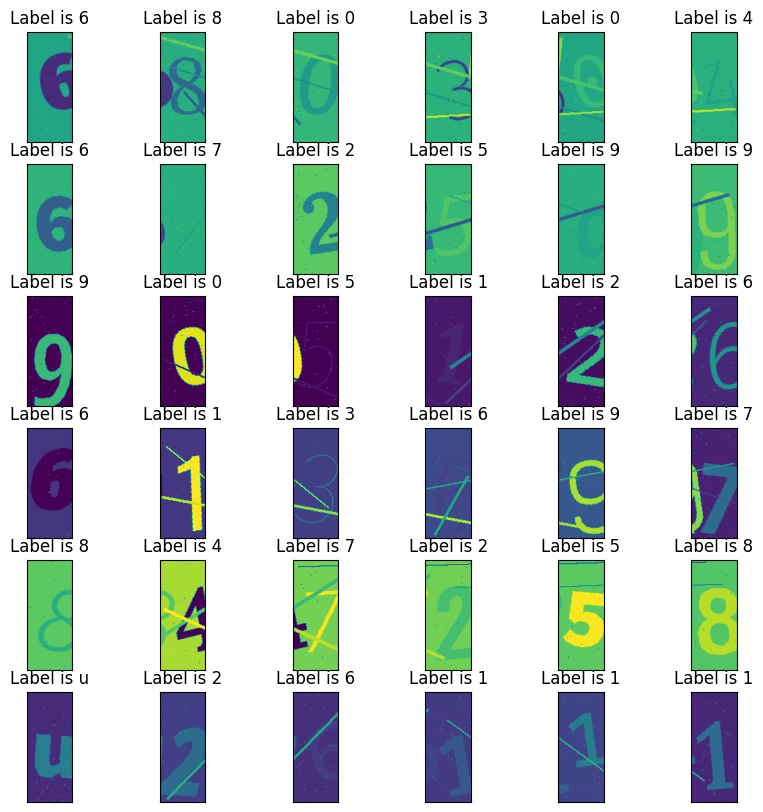

In [ ]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    label = Y_train_digits.iloc[i]['Label']
    plt.title(f'Label is {label}')


plt.show()

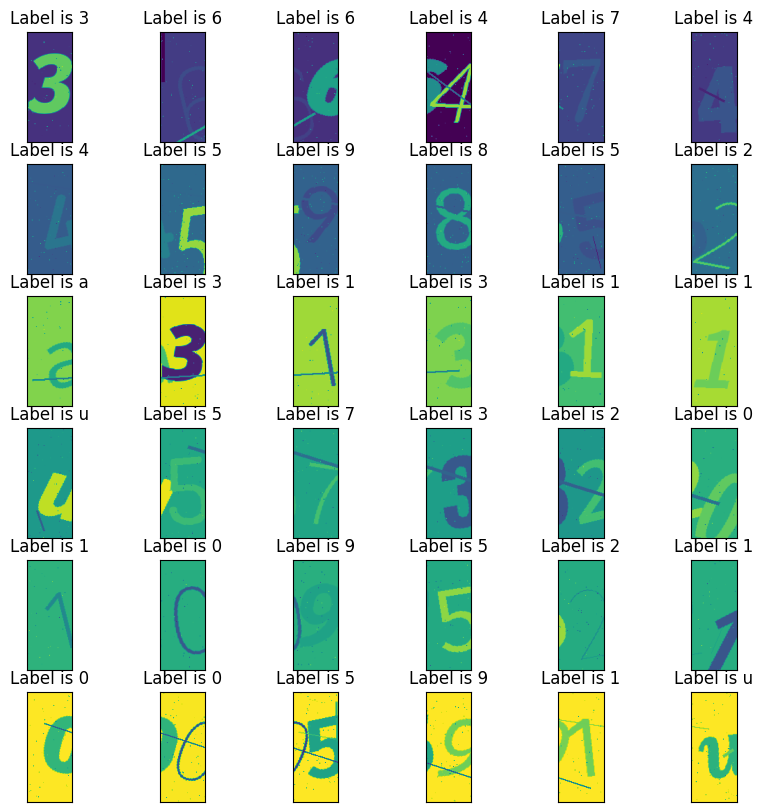

In [9]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val_digits[i])
    label = Y_val_digits.iloc[i]['Label']
    plt.title(f'Label is {label}')


plt.show()

In [ ]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Y_train_labels = Y_train_digits['Label'].to_numpy()
# y_combine = LabelEncoder().fit_transform(Y_train_labels)
# y_one_hot = OneHotEncoder().fit_transform(y_combine.reshape(len(y_combine),1))

Pasamos a representar las etiquetas (dígitos del 0 al 10) en forma de vectores binarios para adaptarlas al proceso de entrenamiento de nuestra red. 

In [ ]:
from keras.utils import to_categorical
Y_train_one_hot = to_categorical(Y_train_digits)
Y_val_one_hot = to_categorical(Y_val_digits)

In [ ]:
print(Y_train_one_hot.shape)
print(Y_val_one_hot.shape)

In [ ]:

# print(X_train.shape)
# print(X_val_digits.shape)


Definición de la red neuronal convolucional (CNN) a través de Keras:

La red consiste de 3 capas Conv2D + MaxPool2D con 64, 128 y 256 filtros respectivamente. Al final añadimos una capan Flatten para converir la salida de la capa Conv2D en un vector de 1 dimensión y otra capa Dense de 10 neuronas de las cuales cada una representa una de las posibles clases con la función de activación "softmax" para convertir el output en probabilidades.

Esto es importante documentar, pues cuando la tenga bien bien lo relleno

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
    strides=None,
    padding='valid',))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
    strides=None,
    padding='valid',))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
    strides=None,
    padding='valid',))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(13, activation='softmax'))

In [ ]:
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train_one_hot, validation_data=(X_val_digits, Y_val_one_hot), epochs=5)

In [ ]:
model.save('model_droput0.3.keras')

In [ ]:
loaded_model=load_model('model.keras')

In [ ]:
loaded_model.summary()

In [10]:
test_path = "data\test\*.png"
test = imread_collection(test_path)

test_digits=[]
c=0
for image in train:

    for x in range (1,7):
        roi = image[0:height, window*(x-1):window*x]
        grayscale_image = color.rgb2gray(roi)
        flattened_image = grayscale_image.ravel()
        normalized_image = (flattened_image - flattened_image.min()) / (flattened_image.max() - flattened_image.min())
        test_digits.append(normalized_image)
        
    c+=1

test_digits = np.array(test_digits).reshape(-1, height, window, 1)


Para generar el output de los datos de validación iteramos por todos los ejemplos en el array de dígitos extraidos de los datos de validación. Como cada captcha se compone de 6 dígitos en total, cada 6 dígitos que predice nuestro modelo los concatenan y llena una entrada en el fichero de salida.

In [20]:

aa=0
output=[]
captcha=[]
id=0
for example in test_digits:

    pred = np.argmax(model.predict(example.reshape(1, 80, window, 1)))
    captcha.append(pred)
    
    if aa == 5:
        joined = ''.join(map(str, captcha))
        output.append([list_id[id],joined])
        captcha = []
        aa = 0
        id+=1
    else:
        aa += 1

csv_file_path = "output.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Id', 'Label'])
    writer.writerows(output)

    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━